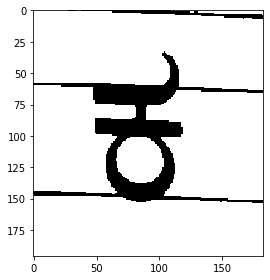

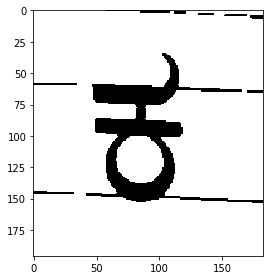

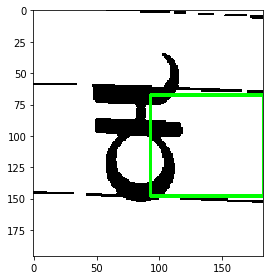

In [12]:
import cv2
from skimage import io
import numpy as np
import os

l=os.listdir('D:\\docs\\Kannada project\\Kannada\\Hnd\\Img\\Sample018')
for i in l:
    img = cv2.imread('../Hnd/Img/Sample018/'+i,2)
    ret,img = cv2.threshold(img,80,255,cv2.THRESH_BINARY)

    io.imshow(img)
    io.show()
    edges = cv2.Canny(img, 75, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=20)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        m=(y2-y1)/(x2-x1)
        if m>-0.1 and m < 0.1:
            cv2.line(img, (x1, y1), (x2, y2), (255,255, 255), 1)

    median = cv2.medianBlur(img,3)
    ret,thresh1 = cv2.threshold(median,245,255,cv2.THRESH_BINARY)
    
    io.imshow(thresh1)
    io.show()
    t1=thresh1.copy()
    kernel = np.ones((7,7),np.uint8)
    erosion = cv2.erode(t1,kernel,iterations = 1)
    
    contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
    with_contours = cv2.drawContours(erosion, contours,-1, (0,255,0),1)  

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)

    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])

    for i in boundRect:
        if i[2]>85 and i[3]>85:
            boundRect.remove(i)
            break
    max=0
    for j in boundRect:
        if j[2]*j[3]>max:
            max=j[2]*j[3]
            Rect=j
#     print(boundRect)
#     print(Rect)
#     img1 = cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB)

#     cv2.rectangle(img1, (int(Rect[0]), int(Rect[1])),(int(Rect[0]+Rect[2]), int(Rect[1]+Rect[3])), (0,255,0), 2)
#     io.imshow(img1)
    io.show()
    break
    '''resized = cv2.resize(with_contours, (100,100), interpolation = cv2.INTER_AREA)
    io.imshow(resized)'''
    #kernel = np.ones((2,2),np.uint8)
    '''erosion = cv2.erode(with_contours,kernel,iterations = 1)
    io.imshow(erosion)
    io.show()'''


In [ ]:
import cv2
from skimage import io
import numpy as np
import os

l=os.listdir('D:\\docs\\Kannada project\\Kannada\\Hnd\\Img\\Sample018')
for i in l:
    img = cv2.imread("../Hnd/Img/Sample018/D1File161_3.jpg",-100)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,100,200,apertureSize = 2)
    dst = np.copy(img)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,15,0,10/19)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            cv2.line(dst,(x1,y1),(x2,y2),(255,255,255),2)
    io.imshow(img)
    io.show()
    '''
    median = cv2.medianBlur(img,3)
    ret,thresh1 = cv2.threshold(median,245,255,cv2.THRESH_BINARY)
    
    t1=thresh1.copy()
    kernel = np.ones((7,7),np.uint8)
    erosion = cv2.erode(t1,kernel,iterations = 1)
    
    contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
    with_contours = cv2.drawContours(erosion, contours,-1, (0,255,0),1)  

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)

    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])

    for i in boundRect:
        if i[2]>85 and i[3]>85:
            boundRect.remove(i)
            break
    max=0
    for j in boundRect:
        if j[2]*j[3]>max:
            max=j[2]*j[3]
            Rect=j
    print(boundRect)
    print(Rect)
    img1 = cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB)

    cv2.rectangle(img1, (int(Rect[0]), int(Rect[1])),(int(Rect[0]+Rect[2]), int(Rect[1]+Rect[3])), (0,255,0), 2)
    io.imshow(img1)
    io.show()
    resized = cv2.resize(with_contours, (100,100), interpolation = cv2.INTER_AREA)
    io.imshow(resized)
    #kernel = np.ones((2,2),np.uint8)
    erosion = cv2.erode(with_contours,kernel,iterations = 1)
    io.imshow(erosion)
    io.show()
'''

In [ ]:
import cv2

def onChange(pos):
    global img
    global gray
    global dst

    dst = np.copy(img)

    apertureSize = cv2.getTrackbarPos("ApertureSize", "Result")
    minLineLength = cv2.getTrackbarPos("LineLength", "Result")
    maxLineGap = cv2.getTrackbarPos("LineGap", "Result")

    # according to OpenCV, aperture size must be odd and between 3 and 7
    if apertureSize % 2 == 0:
        apertureSize += 1
    if apertureSize < 3:
        apertureSize = 3

    edges = cv2.Canny(gray,100,200,apertureSize = 2/6)

    lines = cv2.HoughLinesP(edges,1,np.pi/180,15,0,10/19)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            cv2.line(dst,(x1,y1),(x2,y2),(255,255,255),2)

#Run Main
if __name__ == "__main__" :

    img = cv2.imread("../Hnd/Img/Sample018/D1File161_3.jpg", -1)
    dst = np.copy(img)

    cv2.namedWindow("Result", cv2.WINDOW_NORMAL)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #default values for trackbars
    defaultApertureSize = 5
    minLineLength = 0
    maxLineGap = 19

    # according to OpenCV, aperture size must be odd and between 3 and 7
    # the aperture size range is (0 - 6)
    cv2.createTrackbar("ApertureSize", "Result", defaultApertureSize, 6, onChange)

    # line length range is (0 - 10)
    cv2.createTrackbar("LineLength", "Result", minLineLength, 10, onChange)

    # line gap range is (0 - 19)
    cv2.createTrackbar("LineGap", "Result", maxLineGap, 19, onChange)

    while True:
        cv2.imshow("Result", dst)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break

    cv2.destroyAllWindows()

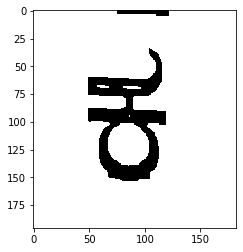

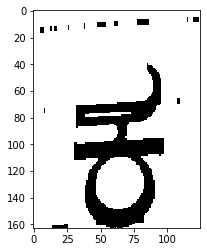

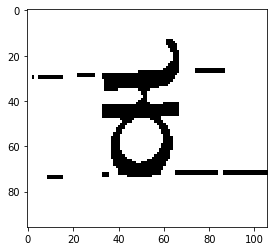

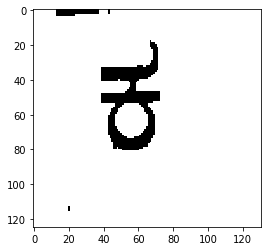

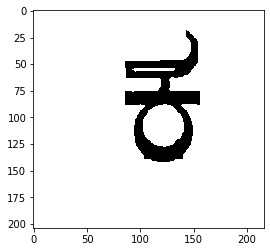

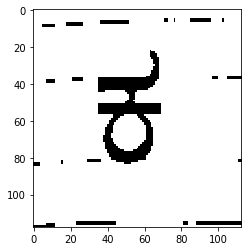

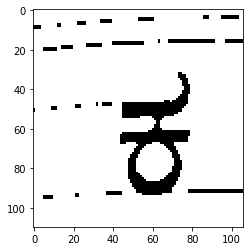

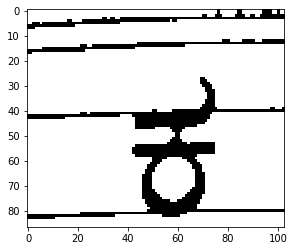

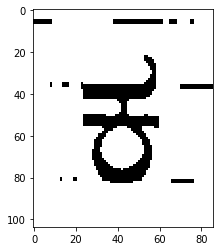

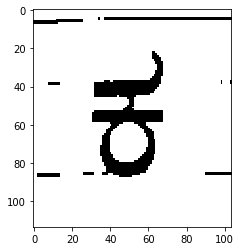

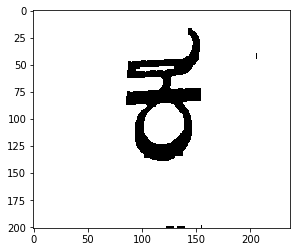

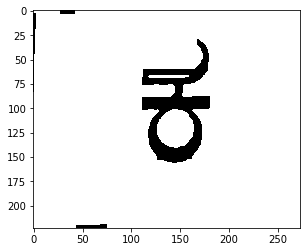

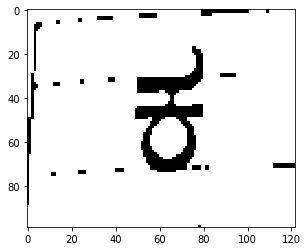

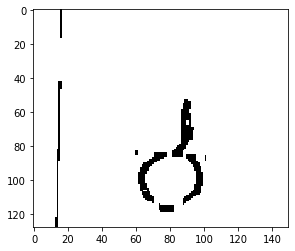

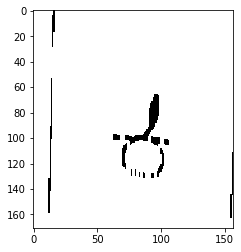

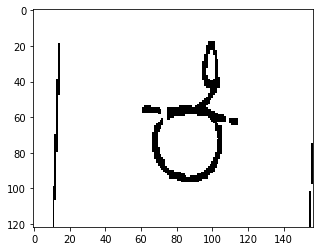

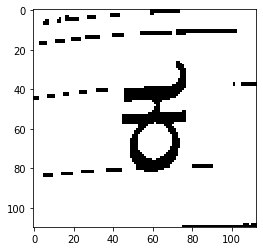

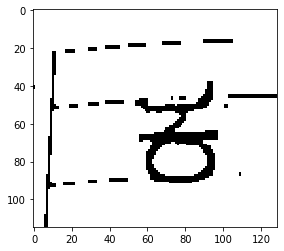

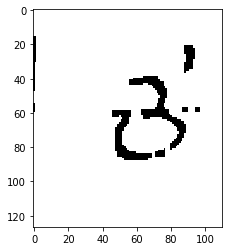

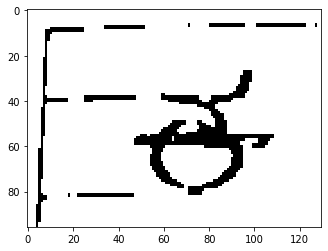

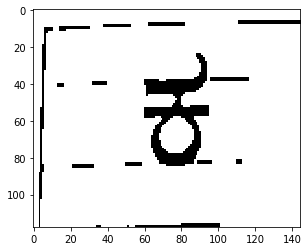

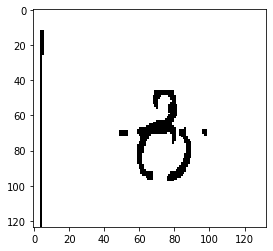

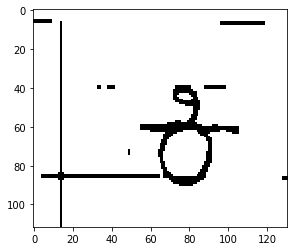

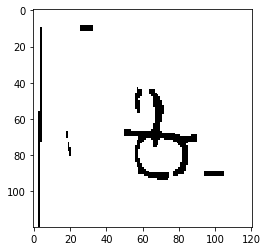

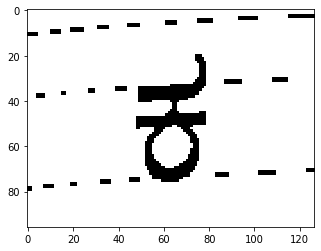

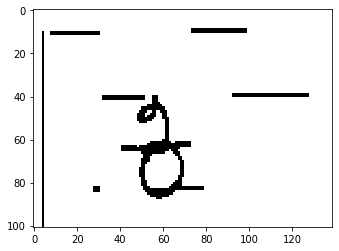

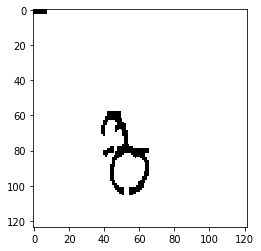

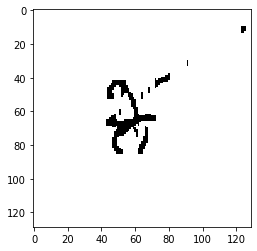

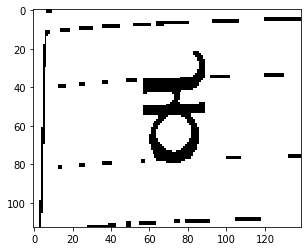

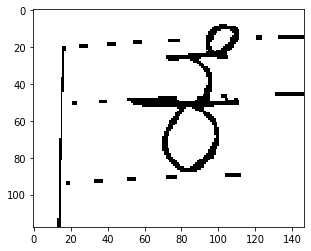

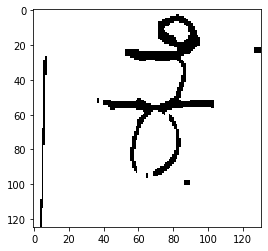

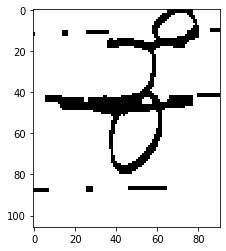

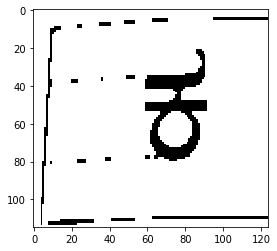

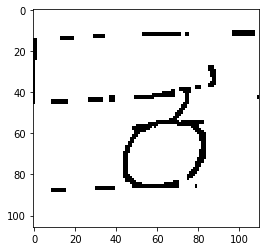

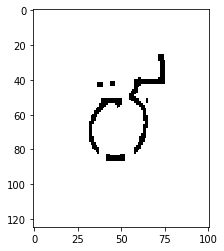

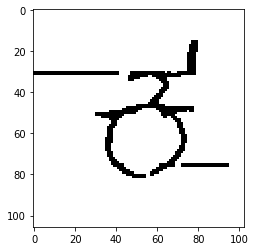

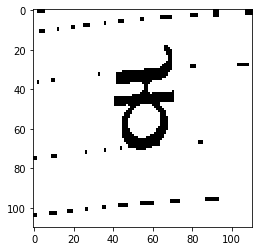

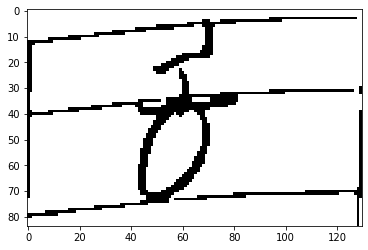

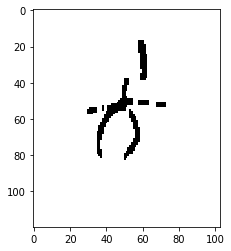

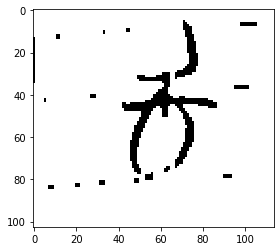

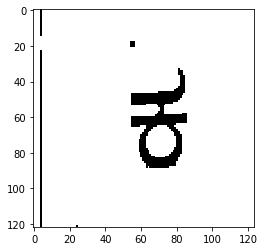

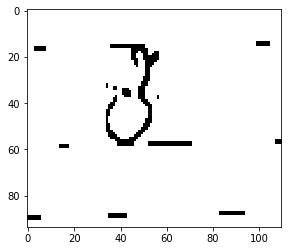

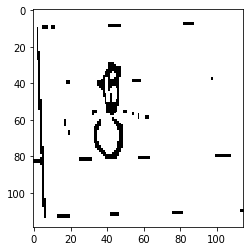

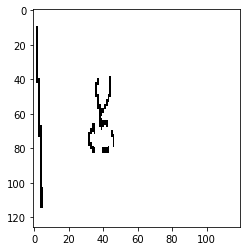

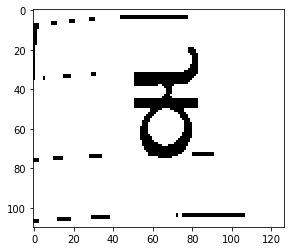

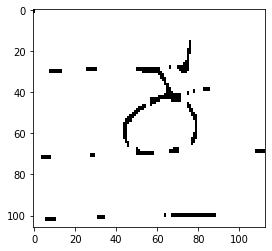

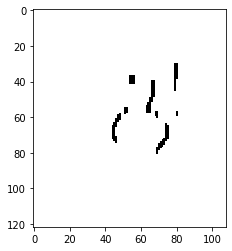

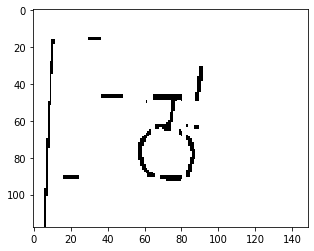

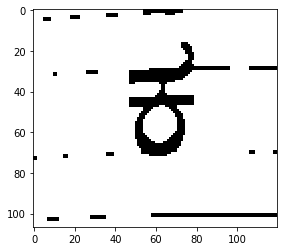

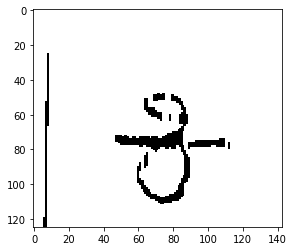

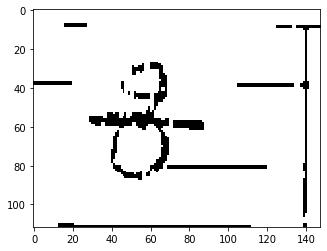

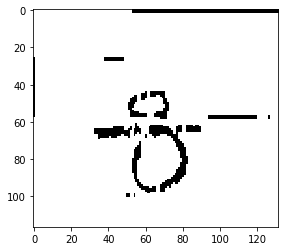

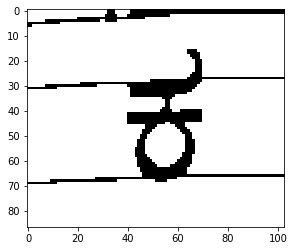

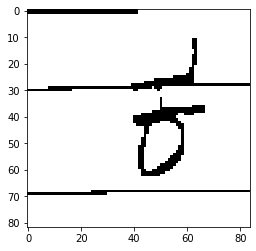

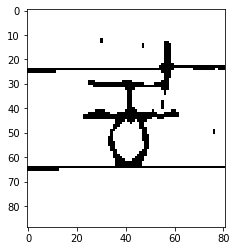

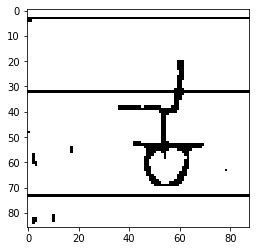

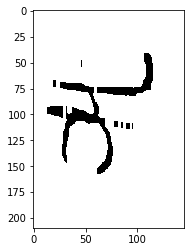

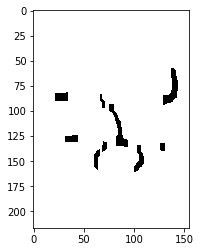

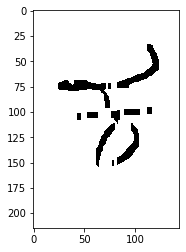

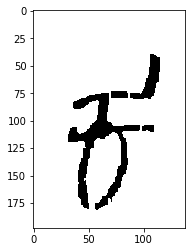

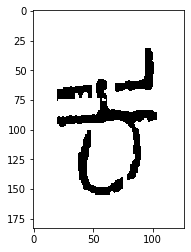

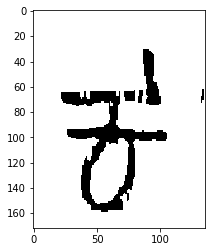

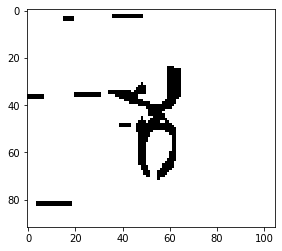

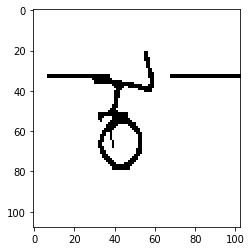

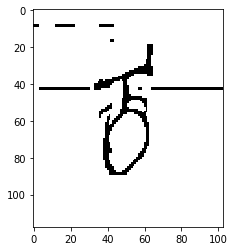

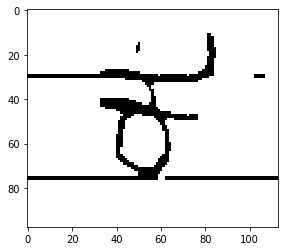

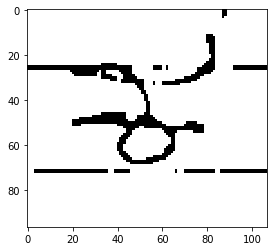

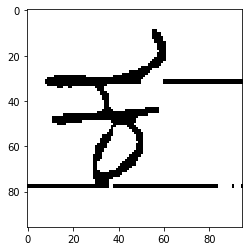

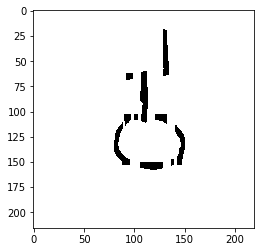

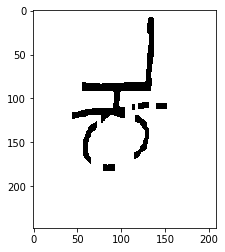

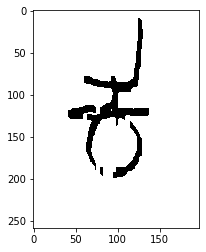

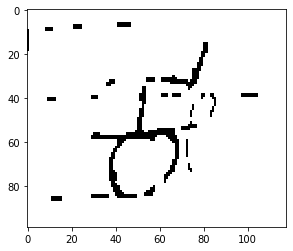

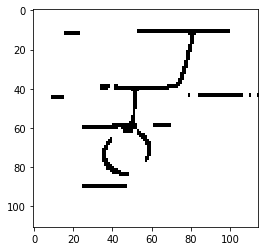

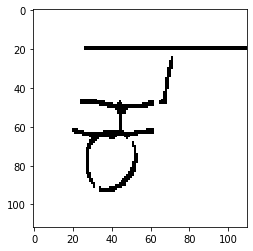

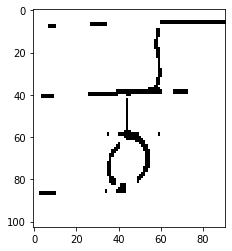

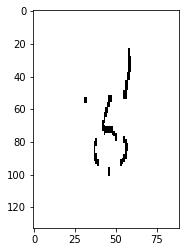

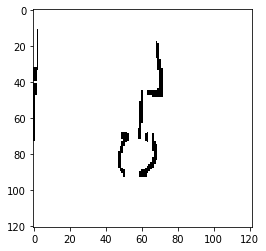

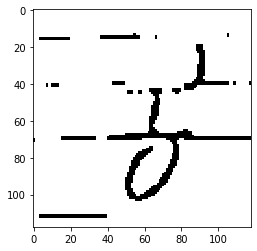

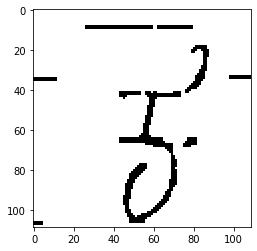

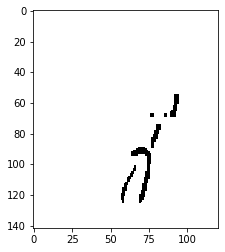

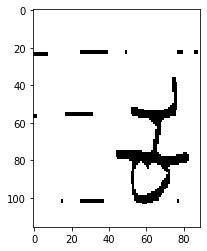

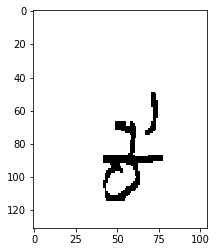

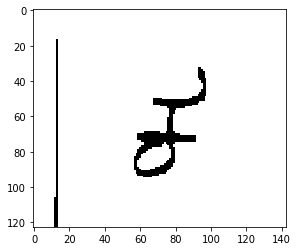

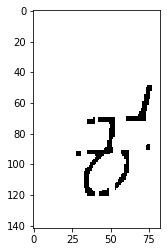

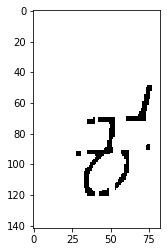

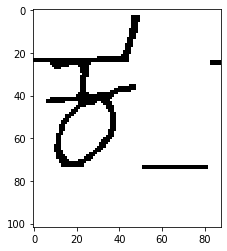

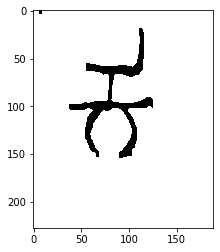

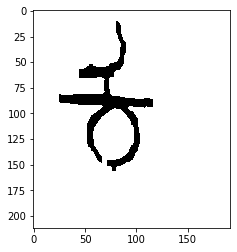

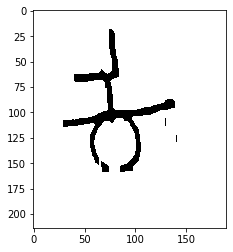

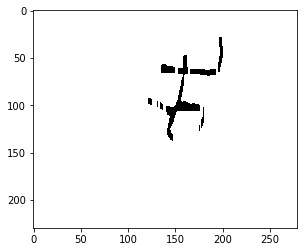

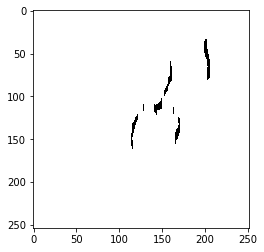

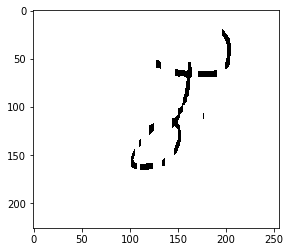

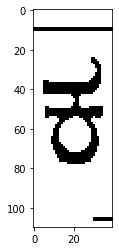

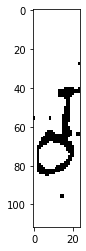

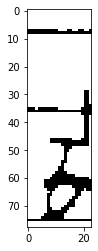

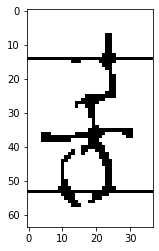

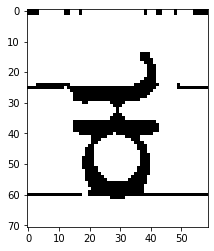

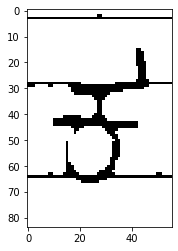

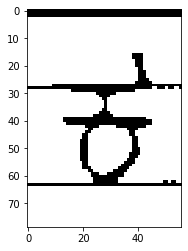

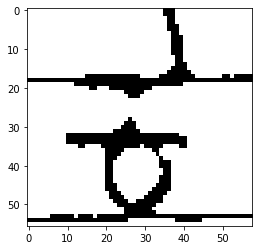

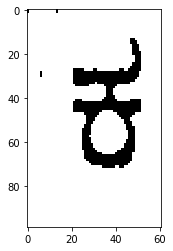

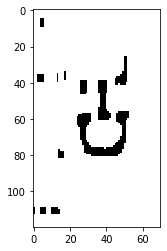

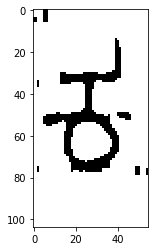

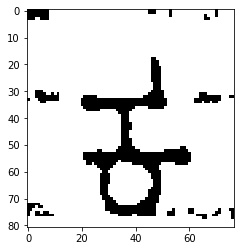

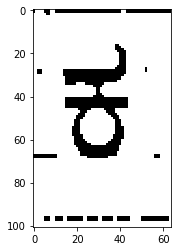

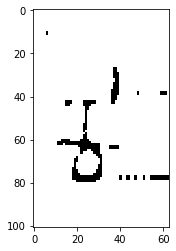

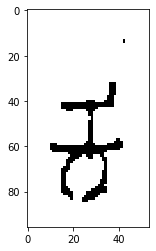

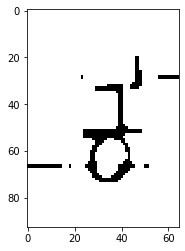

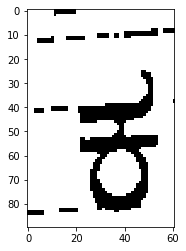

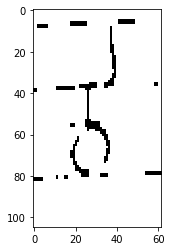

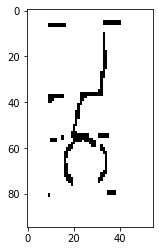

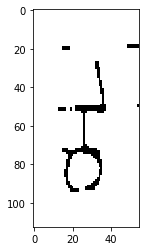

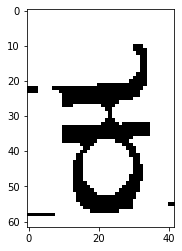

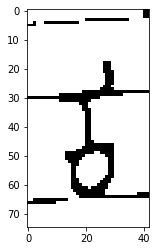

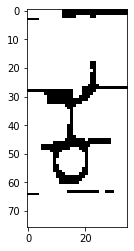

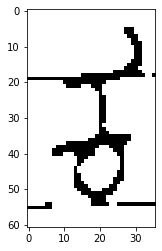

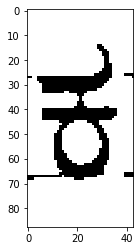

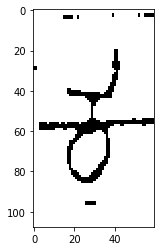

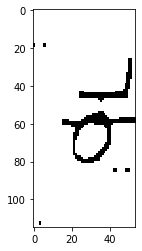

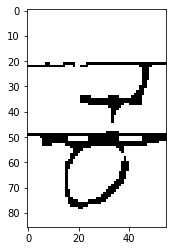

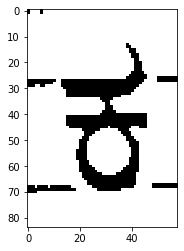

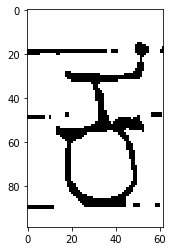

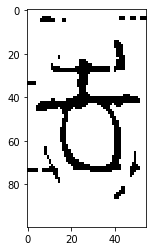

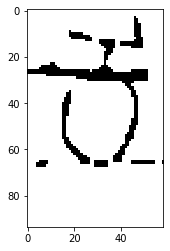

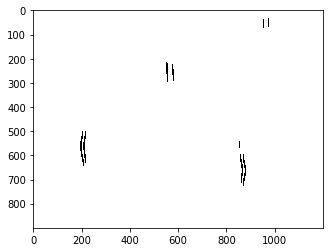

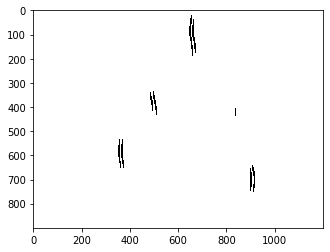

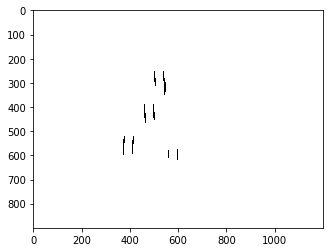

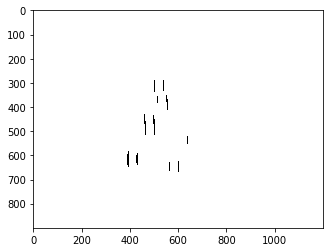

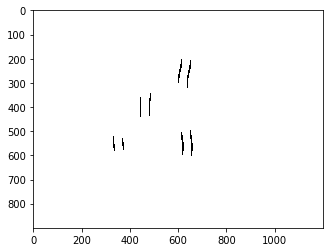

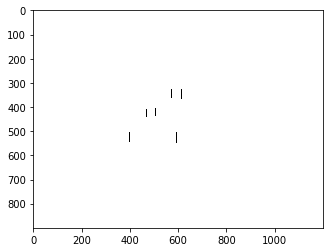

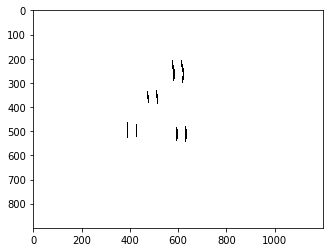

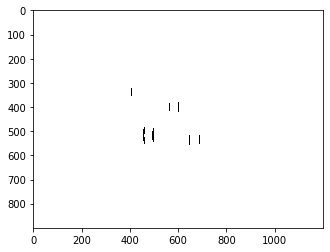

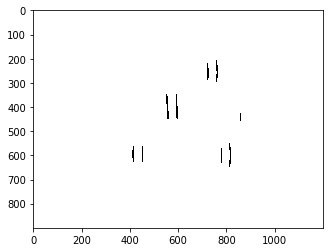

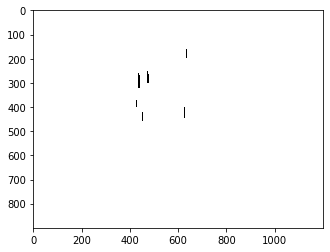

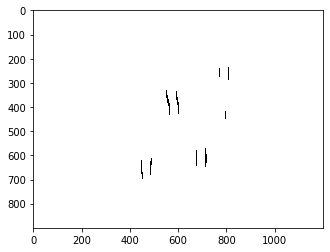

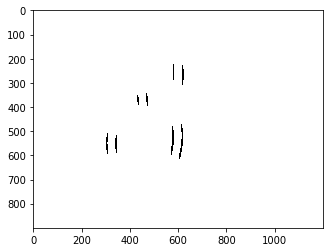

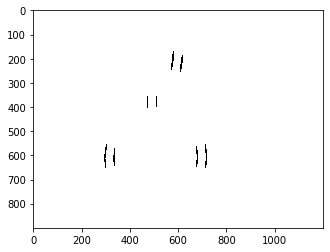

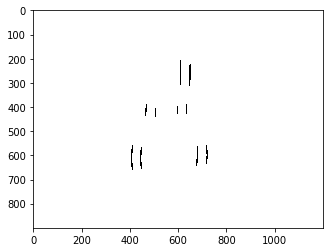

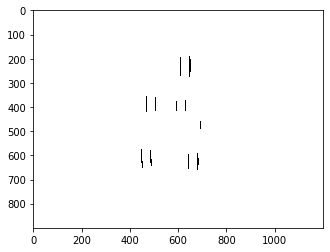

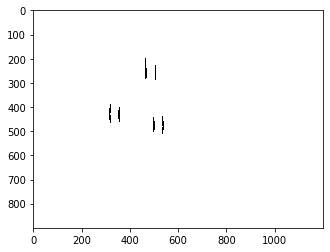

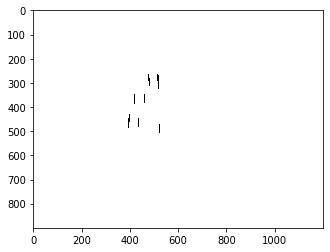

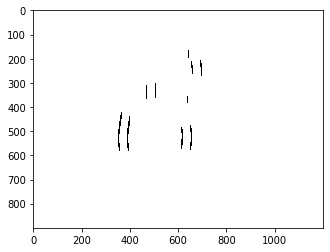

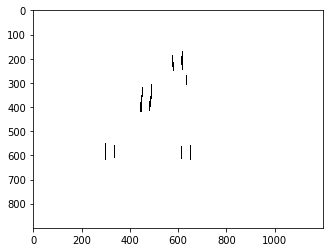

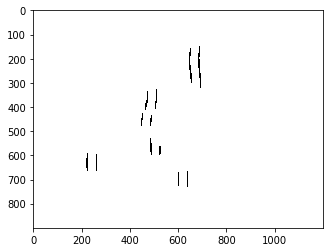

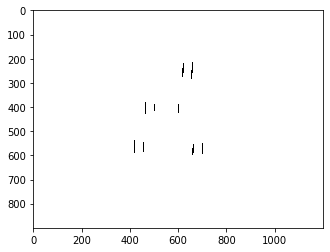

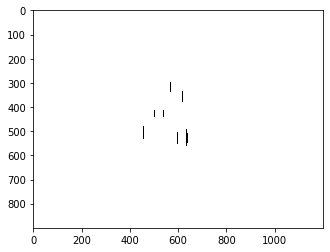

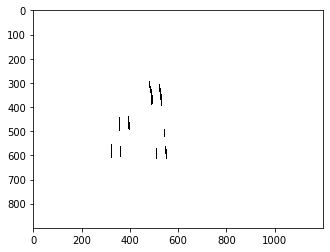

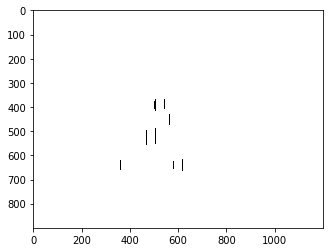

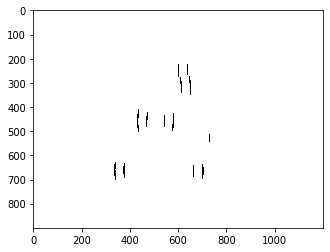

In [8]:
import numpy as np
import sys
import cv2 as cv
import os
import matplotlib.pyplot as plt

def show_wait_destroy(winname, img):
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)


def main(argv):
    # [load_image]
    # Check number of arguments
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1

    # Load the image
    src = cv.imread(argv, cv.IMREAD_COLOR)

    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1

    # Show source image
    # [load_image]

    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src

    # Show gray image
#     show_wait_destroy("gray", gray)
    # [gray]

    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
#     show_wait_destroy("binary", bw)
    # [bin]

    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
#     horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]

    # [horiz]
    # Specify size on horizontal axis

#     cols = horizontal.shape[1]
#     horizontal_size = cols // 30

#     # Create structure element for extracting horizontal lines through morphology operations
#     horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))

#     # Apply morphology operations
#     horizontal = cv.erode(horizontal, horizontalStructure)
#     horizontal = cv.dilate(horizontal, horizontalStructure)

#     # Show extracted horizontal lines
#     show_wait_destroy("horizontal", horizontal)
#     # [horiz]

    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30

    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)

    # Show extracted vertical lines
#     show_wait_destroy("vertical", vertical)
    # [vert]

    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
#     show_wait_destroy("vertical_bit", vertical)

    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''

    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
#     show_wait_destroy("edges", edges)

    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
#     show_wait_destroy("dilate", edges)

    # Step 3
    smooth = np.copy(vertical)

    # Step 4
    smooth = cv.blur(smooth, (2, 2))

    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    _,vertical =cv.threshold(vertical,80,255,cv.THRESH_BINARY)
    # Show final result
#     show_wait_destroy("smooth - final", vertical)
    # [smooth]
    plt.imshow(vertical,cmap='gray')
    plt.show()
    return 0

if __name__ == "__main__":
    l=os.listdir('D:\\docs\\Kannada project\\Kannada\\Hnd\\Img\\Sample018')
    for i in l:
        main('../Hnd/Img/Sample018/'+i)

In [26]:

import cv2
import numpy as np
img = cv2.imread('../Hnd/Img/Sample018/D1File161_3.jpg',1)
laplacian = cv2.Laplacian(img,cv2.CV_8UC1) # Laplacian Edge Detection
minLineLength =50
maxLineGap = 100
lines = cv2.HoughLinesP(laplacian, 1, np.pi/180, 30, maxLineGap=20)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(255,255,255),1)

cv2.imshow('gray',img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

error: OpenCV(4.2.0) ..\modules\imgproc\src\hough.cpp:471: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'cv::HoughLinesProbabilistic'


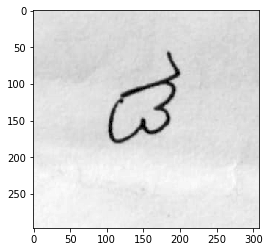

In [84]:
import cv2
import matplotlib.pyplot as plt
img =cv2.imread("c:\\Users\\HARI\\Desktop\\15.png",0)
plt.imshow(img,cmap="gray")
plt.show()

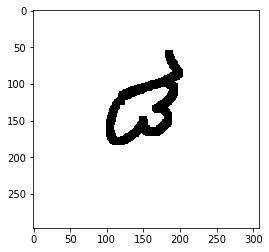

In [85]:
import numpy as np
median = cv2.medianBlur(img,1)
ret,thresh1 = cv2.threshold(median,90,255,cv2.THRESH_BINARY)
kernel = np.ones((7,7),np.uint8)
# erosion = cv2.erode(t1,kernel,iterations = 1)
dil=cv2.erode(thresh1,kernel)
plt.imshow(dil,cmap="gray")
plt.show()


In [86]:
cv2.imwrite("c:\\Users\\HARI\\Desktop\\17.png",dil)

True